# SVM analysis using spectrogem matrix data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from  sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

In [3]:
import os
import sys
from pathlib import Path
import numpy as np

In [56]:
# Read numpy arrays from the 'Audio np arrays' folder
# Creating X,y (data, label) 
X = []
y = []
for digit in range(10):
    # Directory of wav files
    dir_list = os.listdir(f"./Audio np arrays/{digit}/")

    for i, np_arr  in enumerate(dir_list):
        flat_arr = np.ravel(np.load(f"./Audio np arrays/{digit}/{np_arr}"))
        X.append(flat_arr)
        y.append(digit)

In [57]:
print(type(X[0]))
print(len(X), len(y))

<class 'numpy.ndarray'>
240 240


In [58]:
# Split data into training, testing and validating sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)
# X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.25, random_state=5)

In [60]:
print(np.unique(np.array(y_train)))
print(np.unique(np.array(y_test)))
# print(np.unique(np.array(y_valid)))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [62]:
# With K-fold cross validations

folds = KFold(n_splits=4, shuffle=True, random_state=7)

model  = SVC(C=1, gamma='auto', kernel='rbf')

results = cross_val_score(model, X_train, y_train, cv=folds, scoring='accuracy', n_jobs=1)

In [64]:
import pandas as pd

In [65]:
# Searching for correct c term

params = {"C" : [0.1, 1, 10, 100, 1000, 2000]}
model = SVC(gamma='auto')
c_opt = GridSearchCV(estimator= model,
                     param_grid=params,
                     scoring="accuracy",
                     cv=folds,
                     n_jobs= -1,
                     verbose=1,
                     return_train_score=True)

c_opt.fit(X_train, y_train)
c_results = pd.DataFrame(c_opt.cv_results_)
c_results

Fitting 4 folds for each of 6 candidates, totalling 24 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.220082,0.007525,0.069867,0.005127,0.1,{'C': 0.1},0.142857,0.047619,0.142857,0.095238,0.107143,0.039484,1,0.166667,0.134921,0.166667,0.18254,0.162698,0.017297
1,0.231490,0.016228,0.070709,0.008071,1,{'C': 1},0.142857,0.047619,0.142857,0.095238,0.107143,0.039484,1,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
2,0.224888,0.008958,0.075050,0.012169,10,{'C': 10},0.142857,0.047619,0.142857,0.095238,0.107143,0.039484,1,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
3,0.219146,0.007354,0.074968,0.009261,100,{'C': 100},0.142857,0.047619,0.142857,0.095238,0.107143,0.039484,1,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
4,0.242280,0.011711,0.065647,0.006390,1000,{'C': 1000},0.142857,0.047619,0.142857,0.095238,0.107143,0.039484,1,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000
5,0.209721,0.004772,0.051923,0.000321,2000,{'C': 2000},0.142857,0.047619,0.142857,0.095238,0.107143,0.039484,1,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [67]:
clf  = make_pipeline(StandardScaler(),SVC(kernel='rbf', C=60, gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=60, gamma='auto'))])

In [68]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

0.16666666666666666


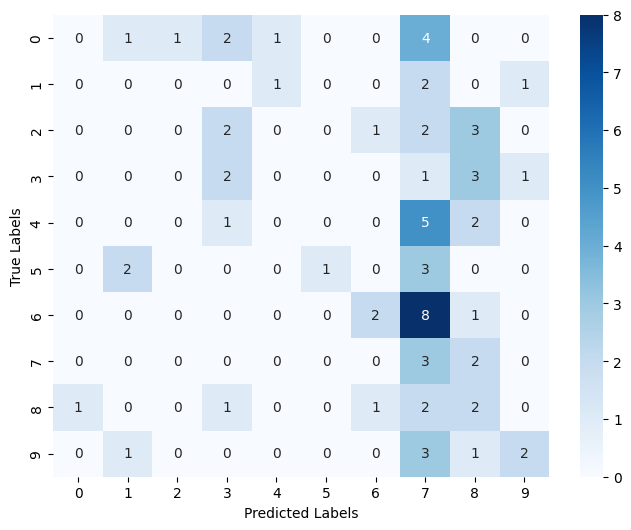

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         8
           3       0.25      0.29      0.27         7
           4       0.00      0.00      0.00         8
           5       1.00      0.17      0.29         6
           6       0.50      0.18      0.27        11
           7       0.09      0.60      0.16         5
           8       0.14      0.29      0.19         7
           9       0.50      0.29      0.36         7

    accuracy                           0.17        72
   macro avg       0.25      0.18      0.15        72
weighted avg       0.25      0.17      0.16        72



In [69]:
y_pred = clf.predict(X_test)
print(accuracy_score(y_test, y_pred))
accuracy = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Create a classification report
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] # replace with your actual class names
print(classification_report(y_test, y_pred, target_names=target_names))

0.43333333333333335


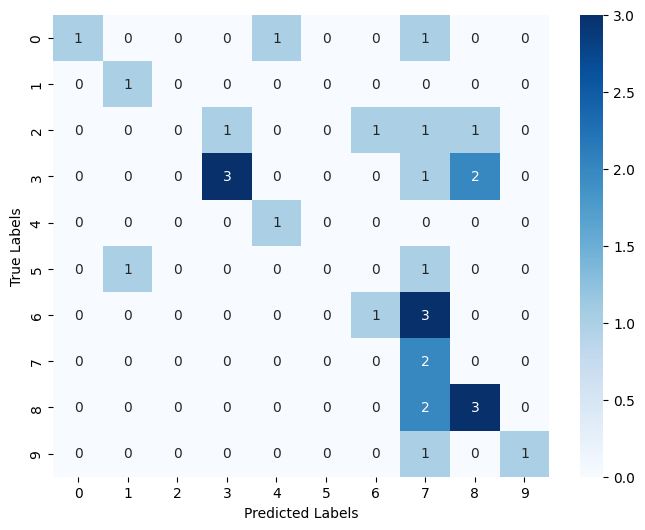

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.50      1.00      0.67         1
           2       0.00      0.00      0.00         4
           3       0.75      0.50      0.60         6
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         2
           6       0.50      0.25      0.33         4
           7       0.17      1.00      0.29         2
           8       0.50      0.60      0.55         5
           9       1.00      0.50      0.67         2

    accuracy                           0.43        30
   macro avg       0.49      0.52      0.43        30
weighted avg       0.51      0.43      0.41        30



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

In [70]:
# Create a classification report for validate data
y_pred = clf.predict(X_valid)
print(accuracy_score(y_valid, y_pred))
accuracy = f1_score(y_valid, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_valid, y_pred)

# Create a confusion matrix
cm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

y_pred = clf.predict(X_valid)
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'] # replace with your actual class names
print(classification_report(y_valid, y_pred, target_names=target_names))